<a href="https://colab.research.google.com/github/dinhquy-nguyen-1704/Weekly_exercise/blob/main/Calculus_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive"

/content/drive/MyDrive


In [8]:
# EXERCISE 1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def get_column(data, index):
    return [i[index] for i in data]

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)

    X = [tv_data, radio_data, newspaper_data]
    y = sales_data

    return X, y, N

In [9]:
X,y, N = prepare_data('advertising.csv')
lst = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(lst)

[624.1, 175.10000000000002, 300.5, 78.9]


#ONE SAMPLE

In [69]:
# EXERCISE 2
import random

def implement(X_data, y_data, epochs = 50, lr = 1e-5):
    losses = []
    N = len(y_data)
    w1, w2, w3, b = initialize_params()
    for epoch in range(epochs):
        loss = []
        for i in range(N):
            x1 = X[0][i]
            x2 = X[1][i]
            x3 = X[2][i]
            y = y_data[i]

            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            lossi = compute_mse_loss(y_hat, y)

            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            #loss.append(lossi)

        #losses.append((1/N)*sum(loss))
            losses.append(lossi)
    return w1, w2, w3, b, losses

def initialize_params():
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    b  = 0

    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)

    return w1, w2, w3, b

def predict(x1, x2, x3, w1, w2, w3, b):
    return w1*x1 + w2*x2 + w3*x3 + b

def compute_mse_loss(y_hat, y):
    return (y_hat - y)**2

def compute_gradient_wi(xi, y, y_hat):
    return 2*xi*(y_hat - y)

def compute_gradient_b(y, y_hat):
    return 2*(y_hat - y)

def update_weight_wi(wi, dl_dwi, lr):
    return wi - lr*dl_dwi

def update_weight_b(b, dl_db, lr):
    return b - lr*dl_db

In [17]:
y_p = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y_p)

1.0


In [21]:
l = compute_mse_loss(y_hat=1, y=0.5)
print(l)

0.25


In [22]:
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

-1.0


In [23]:
g_b =  compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


In [24]:
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print(after_wi)

1.000005


In [25]:
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)
print(after_b)

0.50001


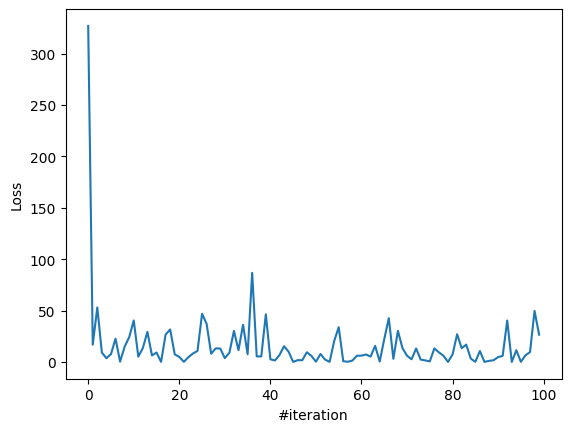

In [15]:
X, y, N = prepare_data('advertising.csv')
w1, w2, w3, b, losses = implement(X, y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [16]:
X, y, N = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement(X,y)
print(w1, w2, w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [17]:
tv = 19.2
radio = 35.9
newspaper = 51.3

X,y, NameError = prepare_data('advertising.csv')
(w1,w2,w3, b, losses) = implement(X, y, epochs = 50, lr = 1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


#N-SAMPLES

In [75]:
# EXERCISE 2 - MAE
import random

def implement(X_data, y_data, epochs = 50, lr = 1e-5):
    losses = []
    N = len(y_data)
    w1, w2, w3, b = initialize_params()
    for epoch in range(epochs):

        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total  = 0.0
        loss_total = 0.0

        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            lossi = compute_mae_loss(y_hat, y)

            loss_total += lossi

            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        w1 = update_weight_wi(w1, dw1_total/N, lr)
        w2 = update_weight_wi(w2, dw2_total/N, lr)
        w3 = update_weight_wi(w3, dw3_total/N, lr)
        b = update_weight_b(b, db_total/N, lr)

        losses.append(loss_total/N)

    return w1, w2, w3, b, losses

def initialize_params():
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    b  = 0

    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)

    return w1, w2, w3, b

def predict(x1, x2, x3, w1, w2, w3, b):
    return w1*x1 + w2*x2 + w3*x3 + b

def compute_mae_loss(y_hat, y):
    return abs(y_hat - y)

def compute_gradient_wi(xi, y, y_hat):
    return xi/(abs(y_hat - y))*(y_hat-y)

def compute_gradient_b(y, y_hat):
    return 1/(abs(y_hat - y))*(y_hat-y)

def update_weight_wi(wi, dwi_total, lr):
    return wi - lr*(dwi_total)

def update_weight_b(b, db_total, lr):
    return b - lr*(db_total)

In [76]:
l = compute_mae_loss(y_hat=1, y=0.5)
print(l)

0.5


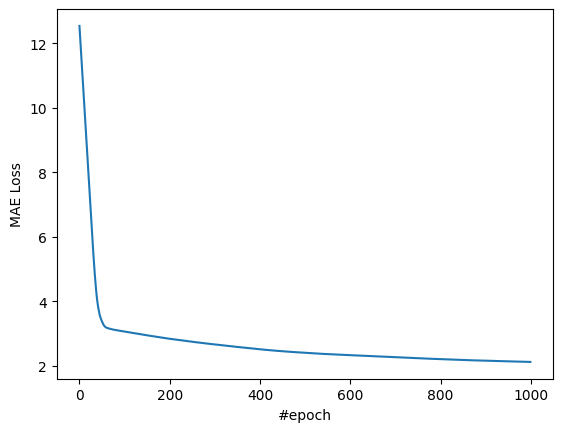

In [77]:
X, y, N = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement(X, y, 1000)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MAE Loss")
plt.show()

In [78]:
X, y, N = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement(X, y, 1000)
print(w1, w2, w3)

0.06983029908250925 0.09743962705182684 0.06188479915217928


In [6]:
# EXERCISE 2 - MSE
import random

def implement(X_data, y_data, epochs = 50, lr = 1e-5):
    losses = []
    N = len(y_data)
    w1, w2, w3, b = initialize_params()
    for epoch in range(epochs):

        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total  = 0.0
        loss_total = 0.0

        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            lossi = compute_mse_loss(y_hat, y)

            loss_total += lossi

            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        w1 = update_weight_wi(w1, dw1_total/N, lr)
        w2 = update_weight_wi(w2, dw2_total/N, lr)
        w3 = update_weight_wi(w3, dw3_total/N, lr)
        b = update_weight_b(b, db_total/N, lr)

        losses.append(loss_total/N)

    return w1, w2, w3, b, losses

def initialize_params():
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    b  = 0

    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)

    return w1, w2, w3, b

def predict(x1, x2, x3, w1, w2, w3, b):
    return w1*x1 + w2*x2 + w3*x3 + b

def compute_mse_loss(y_hat, y):
    return (y_hat - y)**2

def compute_gradient_wi(xi, y, y_hat):
    return 2*xi*(y_hat - y)

def compute_gradient_b(y, y_hat):
    return 2*(y_hat - y)

def update_weight_wi(wi, dwi_total, lr):
    return wi - lr*(dwi_total)

def update_weight_b(b, db_total, lr):
    return b - lr*(db_total)

In [7]:
X, y, N = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement(X, y, 1000)
print(w1, w2, w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


#MATRIX

In [18]:
# EXERCISE 3
def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

  # get tv (index=0)
  tv_data = get_column(data, 0)

  # get radio (index=1)
  radio_data = get_column(data, 1)

  # get newspaper (index=2)
  newspaper_data = get_column(data, 2)

  # get sales (index=3)
  sales_data = get_column(data, 3)

  # building X input  and y output for training
  #Create list of features for input
  X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
  y = sales_data

  return X, y

X, y = prepare_data("advertising.csv")
print(np.array(X)[0])

[  1.  230.1  37.8  69.2]


In [11]:
def initialize_params():
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)

    return [0, 0.016992259082509283, 0.0070783670518262355, -0.002307860847821344]
    # return [bias, w1, w2, w3]

In [33]:
#Predict ouput by using y = x0*b + x1*w1 + x2*w2 + x3*w3

def predict(X_features, weights):
    result = weights.T @ np.array(X_features)
    return result

def compute_loss(y_hat, y):
    return (y_hat - y)**2

# compute gradient
def compute_gradient_w(X_features, y, y_hat):
    dl_dweights = 2*(y_hat - y)*np.array(X_features)
    return dl_dweights

# update weights
def update_weight(weights, dl_dweights, lr):
    weights = weights - lr*dl_dweights
    return weights

In [34]:
def implement_linear_regression(X_feature, y_output, epoch_max=50, lr=1e-5):

  losses = []
  weights = np.array(initialize_params())
  N = len(y_output)
  for epoch in range(epoch_max):
      for i in range(N):
          # get a sample - row i
          features_i = X_feature[i]
          y = y_output[i]

          # compute output
          y_hat = predict(features_i, weights)

          # compute loss
          loss = compute_loss(y, y_hat)

          # compute gradient w1, w2, w3, b
          dl_dweights = compute_gradient_w(features_i, y, y_hat)

          # update parameters
          weights = update_weight(weights, dl_dweights, lr)

          # logging
          losses.append(loss)
  return weights, losses

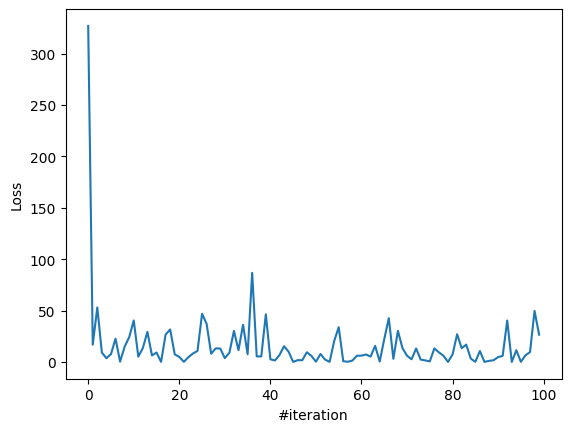

In [35]:
X, y = prepare_data('advertising.csv')
W,L = implement_linear_regression(X,y)
plt.plot(L[0:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [36]:
X, y = prepare_data('advertising.csv')
W,L = implement_linear_regression(X,y)
# Print loss value at interation 9999
print(L[9999])

31.338878034644296


#MIN-MAX

In [44]:
# EXERCISE 4
def min_max_scaling(data1, data2, data3):
    max_data_1 = max(data1)
    max_data_2 = max(data2)
    max_data_3 = max(data3)

    min_data_1 = min(data1)
    min_data_2 = min(data2)
    min_data_3 = min(data3)

    data1 = [(data - min_data_1) / (max(data1) - min(data1)) for data in data1]
    data2 = [(data - min_data_2) / (max(data2) - min(data2)) for data in data2]
    data3 = [(data - min_data_3) / (max(data3) - min(data3)) for data in data3]

    return (data1, data2, data3), (max_data_1, max_data_2, max_data_3, min_data_1, min_data_2, min_data_3)

In [45]:
def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

  # get tv (index=0)
  tv_data = get_column(data, 0)

  # get radio (index=1)
  radio_data = get_column(data, 1)

  # get newspaper (index=2)
  newspaper_data = get_column(data, 2)

  # get sales (index=3)
  sales_data = get_column(data, 3)

  # scale data (only for features)
  # remenber to scale input features in inference, therefore, we need to save max, min and mean values
  (tv_data, radio_data, newspaper_data), (max_data_1, max_data_2, max_data_3, min_data_1, min_data_2, min_data_3) = min_max_scaling(tv_data,radio_data,newspaper_data)

  # building X input  and y output for training
  #Create list of features for input
  X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
  y = sales_data
  return X, y

In [46]:
def predict(X_features, weights):
    return sum([f*w for f, w in zip(X_features, weights)])

def compute_loss(y_hat, y):
    return (y_hat - y)**2

# compute gradient
def compute_gradient_w(X_features, y, y_hat):
    dl_dweights = [2*xi*(y_hat-y) for xi in X_features]
    return dl_dweights

# update weights
def update_weight(weights, dl_dweights, lr):
    weights = [w - lr*dw for w, dw in zip(weights, dl_dweights)]
    return weights

In [47]:
def initialize_params():
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)

    return [0, 0.016992259082509283, 0.0070783670518262355, -0.002307860847821344]
    # return [bias, w1, w2, w3]

In [48]:
def implement_linear_regression(X_feature, y_ouput, epoch_max=50, lr=0.01):

  losses = []
  weights = initialize_params()
  N = len(y_ouput)
  for epoch in range(epoch_max):
      for i in range(N):
          # get a sample - row i
          features_i = X_feature[i]
          y = y_ouput[i]

          # compute output
          y_hat = predict(features_i, weights)

          # compute loss
          loss = compute_loss(y, y_hat)

          # compute gradient w1, w2, w3, b
          dl_dweights = compute_gradient_w(features_i, y, y_hat)

          # update parameters
          weights = update_weight(weights, dl_dweights, lr)

          # logging
          losses.append(loss)
  return weights, losses

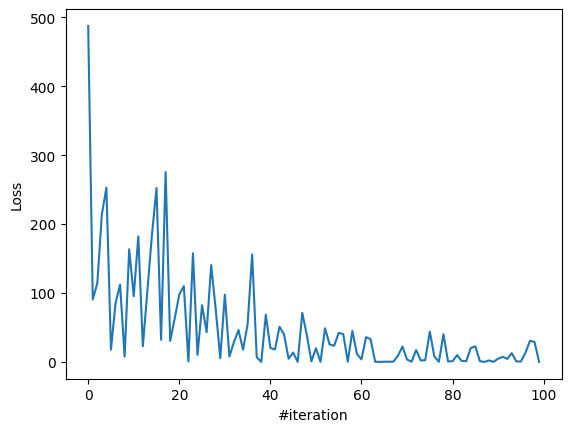

In [49]:
X,y = prepare_data('advertising.csv')
W,L = implement_linear_regression(X,y)
plt.plot(L[0:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

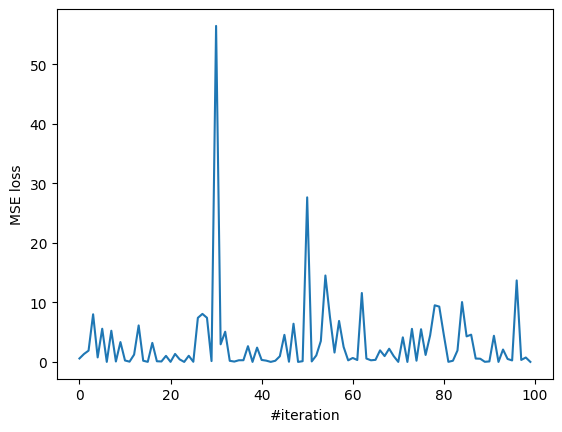

In [50]:
X,y = prepare_data('advertising.csv')
W,L = implement_linear_regression(X,y)
plt.plot(L[-100:])
plt.xlabel("#iteration")
plt.ylabel("MSE loss")
plt.show()